# SVM Machine learning of MNIST
---

Imports

In [22]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import tensorflow as tf
import keras
import numpy as np
import cv2
from matplotlib import pyplot as plt


## Pre process data
---
Load MNIST data set (images with numbers)

In [19]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

h_image = np.shape(X_train)[1]
w_image = np.shape(X_train)[2]

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

num_classes = 10


Convert 1-dimensional class arrays to 10-dimensional class matrices

In [3]:
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

## Create machine learning model
1. First layer - flatten layer. This layer get the input features (Every pixel is a feature) as 2-D and flatten it to 1-D.
2. Second layer - dense layer. This layer take the previews layer and do a calculation for the number of outputs that we want. In this example we use the [softmax](https://stats.stackexchange.com/questions/233658/softmax-vs-sigmoid-function-in-logistic-classifier) activation function for multinomial logistic regression.

The optimizer that we use is [Adam](https://medium.com/syncedreview/iclr-2019-fast-as-adam-good-as-sgd-new-optimizer-has-both-78e37e8f9a34) and categorical crossentropy for the multinomial logistic regression.


In [25]:
model_numbers = keras.Sequential([
    keras.layers.Flatten(input_shape=(h_image,w_image)),  # input layer (1)
    keras.layers.RandomFourierFeatures(
    output_dim=4096, kernel_initializer='gaussian', scale=10,
    trainable=False, name=None),
    keras.layers.Dense(units=10) # output layer (2)  
])

print(model_numbers.summary())


# model_numbers.compile(
#     optimizer='adam',
#     loss='hinge',
#     metrics=['categorical_accuracy']
# )

model_numbers.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss=keras.losses.hinge,
    metrics=[keras.metrics.CategoricalAccuracy(name="acc")],
)



Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 784)               0         
                                                                 
 random_fourier_features_10   (None, 4096)             3215361   
 (RandomFourierFeatures)                                         
                                                                 
 dense_10 (Dense)            (None, 10)                40970     
                                                                 
Total params: 3,256,331
Trainable params: 40,970
Non-trainable params: 3,215,361
_________________________________________________________________
None


## Train the model
---
The model take X_train in shape of (number_of_trains,hight_of_image,width_of_image) and Y_train in shape of (number_of_trains,num_of_classes,num_of_classes). The Y train is One hot matrix.

In [26]:
model_numbers.fit(X_train, Y_train, epochs=20, batch_size=128, validation_split=0.2)


test_loss, test_acc = model_numbers.evaluate(X_test,  Y_test, verbose=1) 

print('Test accuracy:', test_acc)

predictions_of_test = model_numbers.predict(X_train)
predictions_of_test = np.argmax(predictions_of_test, axis=1)
predictions_of_train = model_numbers.predict(X_test)
predictions_of_train = np.argmax(predictions_of_train, axis=1)

Epoch 1/20
375/375 [==============================] - 10s 25ms/step - loss: 0.0811 - acc: 0.8682 - val_loss: 0.0450 - val_acc: 0.9325
Epoch 2/20
375/375 [==============================] - 10s 28ms/step - loss: 0.0418 - acc: 0.9377 - val_loss: 0.0364 - val_acc: 0.9465
Epoch 3/20
375/375 [==============================] - 9s 24ms/step - loss: 0.0330 - acc: 0.9524 - val_loss: 0.0298 - val_acc: 0.9578
Epoch 4/20
375/375 [==============================] - 10s 26ms/step - loss: 0.0287 - acc: 0.9590 - val_loss: 0.0263 - val_acc: 0.9632
Epoch 5/20
375/375 [==============================] - 9s 25ms/step - loss: 0.0259 - acc: 0.9631 - val_loss: 0.0272 - val_acc: 0.9610
Epoch 6/20
375/375 [==============================] - 9s 25ms/step - loss: 0.0228 - acc: 0.9688 - val_loss: 0.0251 - val_acc: 0.9662
Epoch 7/20
375/375 [==============================] - 10s 26ms/step - loss: 0.0214 - acc: 0.9707 - val_loss: 0.0242 - val_acc: 0.9688
Epoch 8/20
375/375 [==============================] - 9s 25ms/ste

## Preview predicted image
--- 

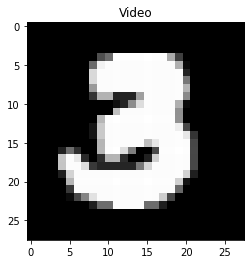

3

In [27]:
def show_img_in_notebook(frame):
    RGB_im = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)    
    plt.imshow(RGB_im)
    plt.title("Video")
    plt.show()
    
test = 200
show_img_in_notebook(X_test[test,:,:])
predictions_of_train[test]

Text(0.5, 257.44, 'Predicted label')

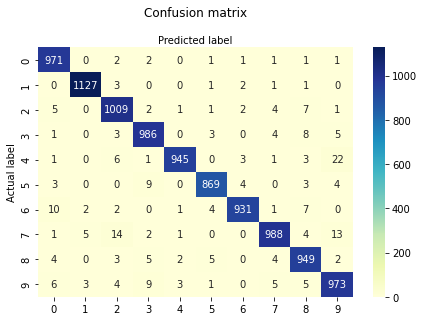

In [28]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions_of_train)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Image augmenting
---
The image augmenting is based on this [link](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html)

In [29]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
X_train_4 = X_train.reshape(X_train.shape + (1,))

# train_generator = train_datagen.flow(X_train_4,Y_train,batch_size=batch_size,shuffle=True, save_to_dir='preview', save_prefix='num_test', save_format='jpeg')

train_generator = train_datagen.flow(X_train_4,Y_train,batch_size=batch_size,shuffle=True)


X_test_4 = X_test.reshape(X_test.shape + (1,))
# this is a similar generator, for validation data
# validation_generator = test_datagen.flow(X_test_4,Y_test,batch_size=batch_size,shuffle=True, save_to_dir='preview', save_prefix='num_train', save_format='jpeg')

validation_generator = test_datagen.flow(X_test_4,Y_test,batch_size=batch_size,shuffle=True)

## Model training
---

In [30]:
model_numbers.fit(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model_numbers.save_weights('first_try.h5')  # always save your weights after training or during training

Epoch 1/50
125/125 [==============================] - 2s 12ms/step - loss: 0.8445 - acc: 0.1020 - val_loss: 0.5406 - val_acc: 0.0825
Epoch 2/50
125/125 [==============================] - 1s 12ms/step - loss: 0.5822 - acc: 0.0930 - val_loss: 0.3903 - val_acc: 0.0825
Epoch 3/50
125/125 [==============================] - 2s 12ms/step - loss: 0.4431 - acc: 0.1005 - val_loss: 0.4061 - val_acc: 0.0925
Epoch 4/50
125/125 [==============================] - 2s 12ms/step - loss: 0.4166 - acc: 0.1210 - val_loss: 0.4399 - val_acc: 0.1225
Epoch 5/50
125/125 [==============================] - 1s 11ms/step - loss: 0.4024 - acc: 0.1015 - val_loss: 0.4402 - val_acc: 0.0850
Epoch 6/50
125/125 [==============================] - 2s 14ms/step - loss: 0.3986 - acc: 0.1105 - val_loss: 0.3070 - val_acc: 0.0950
Epoch 7/50
125/125 [==============================] - 2s 14ms/step - loss: 0.3666 - acc: 0.1205 - val_loss: 0.3297 - val_acc: 0.0962
Epoch 8/50
125/125 [==============================] - 1s 9ms/step - l

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model_numbers.evaluate(X_test,  Y_test, verbose=1) 

print('Test accuracy:', test_acc)

predictions_of_test = model_numbers.predict(X_train)
predictions_of_test = np.argmax(predictions_of_test, axis=1)
predictions_of_train = model_numbers.predict(X_test)
predictions_of_train = np.argmax(predictions_of_train, axis=1)

313/313 [==============================] - 0s 1ms/step - loss: 36.3743 - accuracy: 0.8549
Test accuracy: 0.8549000024795532


Text(0.5, 257.44, 'Predicted label')

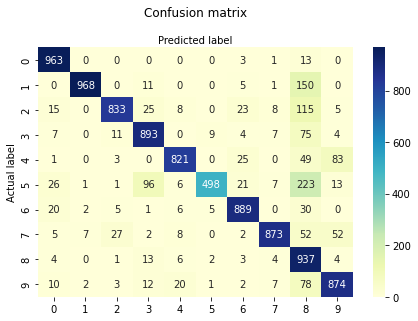

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions_of_train)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')